##  Artificial Recurrent Neural Network

### The type of algorithm we are using is a Long Short Term Memory (LSTM) 
#### LSTM is used in the field of deep learning and is an artificial recurrent neural network (RNN)
#### Unlike standard feedforward neural networks, LSTM has feedback connections, it is designed to overcome error back-flow problems. it can learn to bridge time internals in excess of 1000 steps

#### In this LSTM we are going to predict stock prices for Apple using the past 60 days  of stock prices / update tesla 2021


### As we are using anaconda NumPy, Pandas and Math should already be installed  notes: now using colab.
### If you have an issues import them, open terminal and try a pip install:
#### pip install Panda   / Data manipulation and Analysis
#### pip install python-math
#### pip install NumPy  / Mathematicl Operations
 
### You will need to stall the following:

#### pip install pandas-datareader  /  no longer working for yahoo stocks
#### pip install matplotlib  / Visualization 
#### pip install keras  / API / library for deep learning model Tensorflow 
#### pip install -U scikit-learn  / Data Predictive tool 
#### Minmaxscaler / Transforms each feature 
#### io / Data Extraction :  unstructured / semi structured into tables 
#### datetime / Manipulating dates 
#### import request / allows you to send a http request and returns the object 

In [ ]:
import math
import pandas_datareader 
import numpy as np
import pandas as pd
import pandas
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")


In [ ]:
import io
from datetime import datetime
import requests

class YahooData:
  def fetch(ticker, start, end):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'
    }

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"
    
    r = requests.get(url, headers=headers)
    pd = pandas.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return pd

    #web scrapping

## Get the stock data using the web.datareader   amended 12/10/2021 now using data.fetch / io / datatime / requests / yahoo blocked datareader 

In [ ]:
df = YahooData.fetch("TSLA", start="2002-01-01", end="2022-12-31")
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    3.800000    5.000000    3.508000    4.778000    4.778000   
2010-06-30    5.158000    6.084000    4.660000    4.766000    4.766000   
2010-07-01    5.000000    5.184000    4.054000    4.392000    4.392000   
2010-07-02    4.600000    4.620000    3.742000    3.840000    3.840000   
2010-07-06    4.000000    4.000000    3.166000    3.222000    3.222000   
...                ...         ...         ...         ...         ...   
2022-05-09  836.450012  845.630005  781.150024  787.109985  787.109985   
2022-05-10  819.309998  825.359985  774.250000  800.039978  800.039978   
2022-05-11  795.000000  809.770020  727.200012  734.000000  734.000000   
2022-05-12  701.000000  759.659973  680.000000  728.000000  728.000000   
2022-05-13  773.479980  787.349976  751.570007  769.590027  769.590027   

              Volume  
Date          

## .Shape will tell us how many rows and columns we have in our data 

In [ ]:

df.shape

(2991, 6)

## visualise the closing price history 
## plt.figure will create a figure of the plot. we selected the style fivethirtyeight with the imports at the begining of the script

<function matplotlib.pyplot.show>

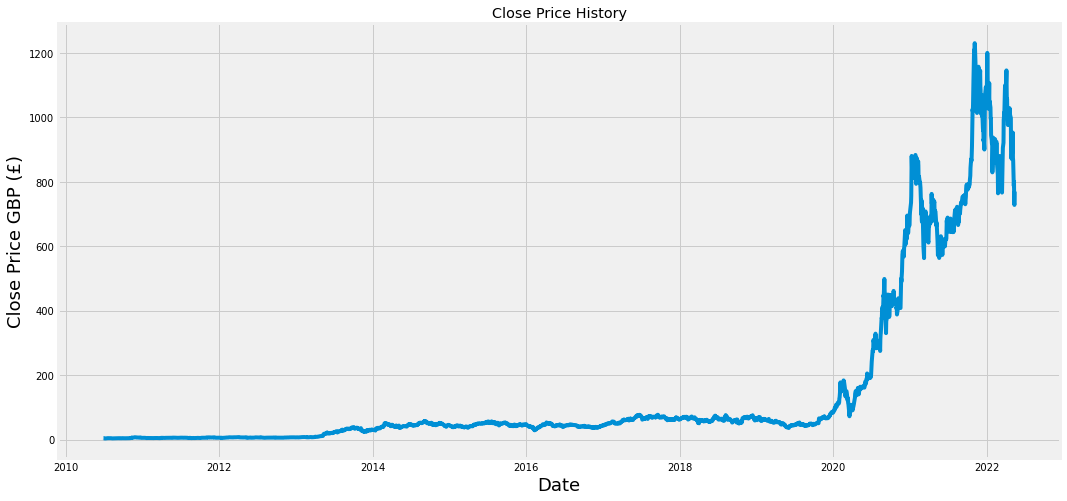

In [ ]:

plt.figure(figsize=(16,8))
#plt.title will add a title 
plt.title("Close Price History")
#plt plot is used to choose the data we want to use we have called our variable holding our data df and choosen the colunm Close
plt.plot(df["Close"])
#plt xlabel will add a label to the x axis fontsize with allow use to choose a size
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price GBP (£)", fontsize=18)
#plt.show is how to call our plot to display
plt.show

## Now we are going to create Data frame that only has the 'close' column showing

In [ ]:

data = df.filter(["Close"])
#Convert te dataframe to a numpy array
dataset = data.values
#Get the number of rows you'd like to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2393

### Now we are going to scale the data.  

#### scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
# we will now create a varible to hold the scaled dataset, Our data will be transformed between the values of 0 and 1
scaled_data = scaler.fit_transform(dataset)
# show scaled_data
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.59575299],
       [0.59086202],
       [0.62476463]])

## We are going to create the training dataset 

In [ ]:
#we are fetching the values from index 0.
train_data = scaled_data[0:training_data_len, :]
#split the data in to X and Y.  The x and y will be empty : x is indepenpdant traing set, y is the dependant 
x_train =[]
y_train =[]
# we are now appending the data for training_data. the x train will append from 0 to 60 (as python is zero indexed this will 0 to 59)
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
    

# below we have x_train dataset followed by the single y_train value of 61

[array([1.31893210e-03, 1.30915016e-03, 1.00427957e-03, 5.54310154e-04,
       5.05400434e-05, 0.00000000e+00, 2.70633781e-04, 2.60851837e-04,
       2.03790498e-04, 3.81495812e-04, 6.58650889e-04, 6.66802509e-04,
       7.89076807e-04, 9.96127953e-04, 7.33645792e-04, 7.20603200e-04,
       8.47768470e-04, 8.95047866e-04, 8.39616851e-04, 7.74403891e-04,
       8.02119399e-04, 7.41797412e-04, 6.74954128e-04, 8.34725879e-04,
       1.00264925e-03, 8.90156894e-04, 7.58100651e-04, 6.17892789e-04,
       6.19523113e-04, 5.26594646e-04, 3.42368036e-04, 2.93458317e-04,
       4.10841643e-04, 4.85836547e-04, 5.46158534e-04, 4.84206223e-04,
       4.87466871e-04, 5.38006914e-04, 7.05930284e-04, 5.54310154e-04,
       6.68432833e-04, 6.43977973e-04, 6.35826353e-04, 6.63541861e-04,
       5.99959225e-04, 7.58100651e-04, 8.57550414e-04, 8.55920090e-04,
       7.72773567e-04, 8.31465231e-04, 8.00489075e-04, 7.12451580e-04,
       8.02119399e-04, 8.67332358e-04, 1.00754022e-03, 8.37986527e-04,
     

### Next we convert the X and Y training dataset into Numpy arrays so will can train our Lstm

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#we will now reshape the x_train dataset
#we need to reshape to 3 dimentional as LSTM model won't run on 2 dimentional 
#below show the 2 dimentional shape
x_train.shape

(2333, 60)

In [ ]:
#to reshape the data  I have sample 1752,(your data set will be diffent use your x_train.shape figure)
#time steps (colunms) 60, 1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#check the shape
x_train.shape

(2333, 60, 1)

## Now we build the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 57s 20ms/step - loss: 2.8145e-05


In [ ]:
#create the test data set
#create an array
test_data = scaled_data[training_data_len - 60: , :]
#create the data test x_test y_test
x_test =[]
Y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a Numpy array
x_test = np.array(x_test)

In [ ]:
#reshape to 3 dimensional shape. features, time step and columns
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [ ]:
#predicted price values / we are undoing the previous scaler
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#evaluate the model.  get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - Y_test)**2)
rmse

#Usually, a RMSE score of less than 180 is considered a
#good score for a moderately or well working algorithm. In case,
#the RMSE value exceeds 180, we need to perform feature 
#selection and hyper parameter tuning on the parameters of the model.

53.400233169182926

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


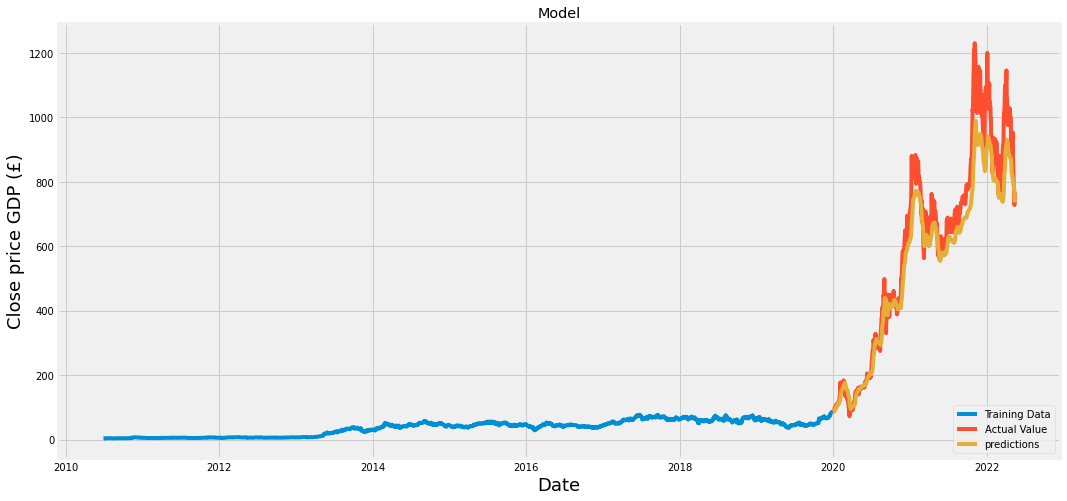

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#vistualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price GDP (£)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Training Data', 'Actual Value', 'predictions'], loc='lower right')
               
               